In [212]:
#primero importamos librerias necesarias
import pandas as pd
import numpy as np
# Configuración para mostrar gráficas en notebook
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
###
import seaborn as sb

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Agregado por el profesor

## Se procesa el archivo 1

In [213]:
#primer dataset, correspondiende al crecimiento de población de distintos paises, por año
df1 = pd.read_csv("Datasets/API_SP.POP.GROW_DS2_en_csv_v2_2164049.csv") 

In [214]:
# Setea el máximo de lineas a mostrar
pd.set_option('display.max_rows', 1000)

In [215]:
df_melt = pd.melt(df1, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])
df_melt.head(3)
df_melt.describe(include='all')


,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
count,16104,16104,16104,16104,16104,15407.000000
unique,264,264,1,1,61,NaN
top,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1960,NaN
freq,61,61,16104,16104,264,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.779473
std,NaN,NaN,NaN,NaN,NaN,1.559389
min,NaN,NaN,NaN,NaN,NaN,-10.955149
25%,NaN,NaN,NaN,NaN,NaN,0.779336
50%,NaN,NaN,NaN,NaN,NaN,1.750733
75%,NaN,NaN,NaN,NaN,NaN,2.631154


In [216]:
len(df_melt['Country Name'].unique())
# Se pueden ver que hay 264 paises

264

In [217]:
df_melt.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'variable', 'value'],
      dtype='object')

In [218]:
df_melt.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
variable            0
value             697
dtype: int64

In [219]:
df_nulls = df_melt.loc[df_melt['value'].isna(),:]
df_count_by_year = df_nulls[['variable','Country Name']].groupby(['variable'], as_index=False).count()

df_count_by_year.loc[df_count_by_year['Country Name']==264,:]
# Se puede ver que a todos los paises les falta el año 1960 y 2020 por lo tanto eliminan esas filas

,variable,Country Name
0,1960,264
60,2020,264


In [220]:
#df_nulls[['Country Name','variable']].groupby(['Country Name'], as_index=False).count()

In [221]:
df_clean = df_melt.drop(df_melt[df_melt['variable'].isin(['1960','2020'])].index)
df_clean

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
264,Aruba,ABW,Population growth (annual %),SP.POP.GROW,1961,2.238144
265,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1961,1.898476
266,Angola,AGO,Population growth (annual %),SP.POP.GROW,1961,1.393363
267,Albania,ALB,Population growth (annual %),SP.POP.GROW,1961,3.120855
268,Andorra,AND,Population growth (annual %),SP.POP.GROW,1961,6.941532
...,...,...,...,...,...,...
15835,Kosovo,XKX,Population growth (annual %),SP.POP.GROW,2019,-0.157992
15836,"Yemen, Rep.",YEM,Population growth (annual %),SP.POP.GROW,2019,2.300580
15837,South Africa,ZAF,Population growth (annual %),SP.POP.GROW,2019,1.338617
15838,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,2019,2.892373


In [222]:
# Para el resto de los valores una buena estrategía puede ser completar el crecimiento con los valores de la media para cada país
def impute_grow(cols):
    grow=cols[5]
    county = cols[0]
    if pd.isnull(grow):
        # Si en null se retona la media para el pais
        return df_clean.loc[df_clean['Country Name']==county,:]['value'].mean()
    else:
        # Si no es null se retorna el valor que tiene la columna
        return grow

In [223]:
# Aplicamos la funcion
df_clean['value'] = df_clean.apply(impute_grow,axis=1)
df_clean.isnull().sum()
# Se ven que siguen habiendo valores nulos

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
variable           0
value             59
dtype: int64

In [224]:
# Se listan los nulos y se ve que son de un valor de pais que 'Not classified', se borran dichos valores
df_clean.loc[df_clean['value'].isna(),:].head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
372,Not classified,INX,Population growth (annual %),SP.POP.GROW,1961,NaN
636,Not classified,INX,Population growth (annual %),SP.POP.GROW,1962,NaN
900,Not classified,INX,Population growth (annual %),SP.POP.GROW,1963,NaN


In [225]:
df_clean = df_clean.drop(df_clean[df_clean['Country Name']=='Not classified'].index)
df_clean.isnull().sum()
# Se vuelven a contar los nulos y ahora si quedó sin nulos

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
variable          0
value             0
dtype: int64

In [226]:
# Se analiza la columna 'Indicator Code' para ver si tiene otro valor que indique si decrece
# Solo tiene grow
df_clean['Indicator Code'].unique()

array(['SP.POP.GROW'], dtype=object)

## Se procesa el archivo 2

In [227]:
# Realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN


In [228]:
df2_melt = pd.melt(df2, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])

In [229]:
df2_melt.describe(include='all')

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
count,16492,16492,16492,16492,16492,12128.000000
unique,266,266,1,1,62,NaN
top,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
freq,62,62,16492,16492,266,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.686121
std,NaN,NaN,NaN,NaN,NaN,5.855128
min,NaN,NaN,NaN,NaN,NaN,-64.047107
25%,NaN,NaN,NaN,NaN,NaN,1.445700
50%,NaN,NaN,NaN,NaN,NaN,3.814080
75%,NaN,NaN,NaN,NaN,NaN,6.100000


In [230]:
len(df2_melt['Country Name'].unique())
# Se pueden ver que hay 266 paises

266

In [231]:
df_nulls2 = df2_melt.loc[df2_melt['value'].isna(),:]
df_count_by_year2 = df_nulls2[['variable','Country Name']].groupby(['variable'], as_index=False).count()
df_count_by_year2
df_count_by_year2.loc[df_count_by_year2['Country Name']==266,:]
# Se puede ver que para el total de los paises hay 2 valores que se tienen que sacar a todos

,variable,Country Name
0,1960,266
61,Unnamed: 65,266


In [232]:
# Se borran para esos valores
df_clean2 = df2_melt.drop(df2_melt[df2_melt['variable'].isin(['1960','Unnamed: 65'])].index)
df_clean2

,Country Name,Country Code,Indicator Name,Indicator Code,variable,value
266,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
267,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
268,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
269,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,1.869754
270,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1961,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-6.888013
16222,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,NaN
16223,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-6.959604
16224,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2020,-3.016189


In [233]:
# Como el dataset tiene la misma estructura que el anterior, se puede aplicar la misma función para calcular la media
df_clean2['value'] = df_clean2.apply(impute_grow,axis=1)
df_clean2.isnull().sum()
# Se ven que siguen habiendo valores nulos

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
variable            0
value             140
dtype: int64

In [234]:
# Como siguen habiendo valores nulos, se listan
df_clean2.loc[df_clean2['value'].isna(),:]['Country Name'].unique()
# Se pueden ver que son de 3 paises, no quedaron solucionados con la función ya que no tienen ningun valor de medida, por lo tanto, no se puede calcular
# la media. Se van a borrar

array(['Africa Eastern and Southern', 'Not classified',
       "Korea, Dem. People's Rep."], dtype=object)

In [235]:
df_clean2 = df_clean2.drop(df_clean2[df_clean2['Country Name'].isin(['Africa Eastern and Southern', 'Not classified',"Korea, Dem. People's Rep."])].index)
df_clean2.isnull().sum()
# Se vuelven a contar los nulos y ahora si quedó sin nulos

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
variable          0
value             0
dtype: int64

### --------------------------------------------
#### Les queda unir los dataset, pasar los paises a dummys y generar el modelo
### Hasta acá agregó el profesor

In [41]:
#ver si hay valores nulos en el df
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1960               True
1961               True
1962               True
1963               True
1964               True
1965               True
1966               True
1967               True
1968               True
1969               True
1970               True
1971               True
1972               True
1973               True
1974               True
1975               True
1976               True
1977               True
1978               True
1979               True
1980               True
1981               True
1982               True
1983               True
1984               True
1985               True
1986               True
1987               True
1988               True
1989               True
1990               True
1991               True
1992               True
1993               True
1994               True
1995               True
1996               True
1997            

In [42]:
#vemos que hay valores nulos en todas las columnas
# cantidad de valores nulos por columnas
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
1961                4
1962                4
1963                4
1964                4
1965                4
1966                4
1967                4
1968                4
1969                4
1970                4
1971                4
1972                4
1973                4
1974                4
1975                4
1976                4
1977                4
1978                4
1979                4
1980                4
1981                4
1982                4
1983                4
1984                4
1985                4
1986                4
1987                4
1988                4
1989                4
1990                3
1991                3
1992                3
1993                3
1994                3
1995                3
1996                2
1997                2
1998                2
1999                1
2000                1
2001      

In [43]:
# borrar de df1 las columnas correspondientes a los años anteriores a 2000 que es donde está mas incompleto
# y el año 2020 porque no tiene datos
# axis=1 significa que quiero dropear columnas
df1=df1.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df1=df1.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df1=df1.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df1=df1.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df1=df1.drop(['2020'],axis=1)
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,AGO,Population growth (annual %),SP.POP.GROW,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,AND,Population growth (annual %),SP.POP.GROW,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [44]:
# nos quedan los años del 2000 al 2019
# ver si aun quedan NaN en el df
df1.isnull().values.any()

True

In [45]:
# ver en que columnas están los NaN
df1.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007               True
2008               True
2009               True
2010               True
2011               True
2012               True
2013               True
2014               True
2015               True
2016               True
2017               True
2018               True
2019               True
dtype: bool

In [46]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              1
2001              1
2002              1
2003              1
2004              1
2005              1
2006              1
2007              1
2008              1
2009              1
2010              1
2011              1
2012              2
2013              2
2014              2
2015              2
2016              2
2017              2
2018              2
2019              2
dtype: int64

In [142]:
#como solo hay 1 o 2 filas con valor NaN por columna, borramos las filas que tienen NaN en cualquier columna
df1 = df1.dropna()
df1.head(3)
#pasamos de 264 filas en el df original a 262

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020


In [48]:
#sacamos columnas que no sirven
df1_clean=df1.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df1_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,2.055027,2.225930,2.229056,2.109354,1.757353,1.302039,0.799546,0.384052,0.134268,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,0.442122
1,Afghanistan,2.975053,3.902806,4.496720,4.668361,4.321539,3.682732,2.990478,2.493842,2.268277,...,2.746576,3.143126,3.407587,3.494589,3.355582,3.077084,2.778317,2.548347,2.384761,2.311817
2,Angola,3.277204,3.301198,3.329257,3.378811,3.453014,3.537557,3.619575,3.680635,3.710531,...,3.671462,3.634159,3.597774,3.551950,3.497493,3.438851,3.378273,3.322081,3.276134,3.242983
3,Albania,-0.637357,-0.938470,-0.299877,-0.374149,-0.417931,-0.511790,-0.630911,-0.755719,-0.767343,...,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007
4,Andorra,1.572166,2.939992,3.942573,4.375449,4.098923,3.382417,2.659984,2.066338,1.414648,...,-0.016577,-0.834745,-1.588730,-2.025792,-1.951470,-1.529058,-0.919470,-0.383674,0.006493,0.176454


In [49]:
#hacemos un melt para poder mergear y hacer la correlacion luego
df1_melted = pd.melt(df1_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df1_melted

,Country Name,Fecha,Crecimiento porcentual
0,Aruba,2000,2.055027
1,Afghanistan,2000,2.975053
2,Angola,2000,3.277204
3,Albania,2000,-0.637357
4,Andorra,2000,1.572166
...,...,...,...
5235,Kosovo,2019,-0.157992
5236,"Yemen, Rep.",2019,2.300580
5237,South Africa,2019,1.338617
5238,Zambia,2019,2.892373


In [143]:
#realizamos el mismo procedimiento para el segundo dataset
df2 = pd.read_csv("Datasets/GDP_annual_growth_NEW.csv") 
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959,-2.929511,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-1.934778,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869754,3.763086,7.312637,5.450582,4.036111,...,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694,-0.934728,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644,-4.040510,NaN


In [51]:
# borrar de df2 las columnas correspondientes a los años anteriores a 2000 (porque tiene datos incompletos anteriores a esa fecha)
# y el año 2020 que eliminó de df1 porque no tiene datos, así quedan similares los dfs
df2=df2.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966','1967','1968','1969'],axis=1)
df2=df2.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976','1977','1978','1979'],axis=1)
df2=df2.drop(['1980', '1981', '1982', '1983', '1984', '1985', '1986','1987','1988','1989'],axis=1)
df2=df2.drop(['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997','1998','1999'],axis=1)
df2=df2.drop(['2020'],axis=1)
df2=df2.drop(['Unnamed: 65'],axis=1) #borro esta xq es basura
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.616588,-2.971257,-3.273646,1.975547,7.911563,1.214349,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,8.832278,1.414118,11.229715,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


In [52]:
# ver que cantidad de valores NaN  hay en cada columna (todos los años tienen varios nulos, ver que hacer)
df2.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2000              27
2001              21
2002              20
2003              15
2004              15
2005              14
2006              14
2007              13
2008              15
2009              14
2010              14
2011              14
2012              14
2013              14
2014              12
2015              13
2016              14
2017              14
2018              15
2019              20
dtype: int64

In [53]:
#todavia quedan muchas columnas con valores NaN, pensar si es más conveniente reducir los años aun mas o eliminar los paises
#con menos informacion disponible

In [54]:
#borramos todas las filas que tengan valor nulo
df2 = df2.dropna() 
df2
#pasamos de 262 filas a 226, pero igual consideramos que son suficientes paises para seguir con el analisis, se tendrá en cuenta a la hora
#de presentar los resultados que no fueron tomados en cuenta absolutamente todos los paises.

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548
7,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.704940,1.644025,0.528377,4.729056,9.074909,5.456800,...,4.775505,3.926900,6.048721,3.419453,2.717669,3.058921,3.260394,1.036327,2.216738,1.662008
8,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,10.852704,1.399085,2.433457,8.800541,9.566437,4.855141,...,1.602810,6.930272,4.484626,5.053346,4.284304,5.105937,3.060964,2.373537,1.189856,1.677720
9,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-0.788999,-4.408840,-10.894485,8.837041,9.029573,8.851660,...,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-2.080328,2.818503,-2.565352,-2.088015
10,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,5.900000,9.600000,13.200000,14.000000,10.500000,13.900000,...,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,5.200000,7.600000
12,Antigua and Barbuda,ATG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.203431,-4.548003,1.027442,6.076544,5.767029,6.473831,...,-7.840595,-1.958613,3.372866,-0.600876,3.795728,3.825293,5.497788,3.144599,6.950417,3.351161


In [55]:
df2_clean=df2.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
df2_clean.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,3.143734,3.470701,4.027575,2.950518,5.649875,6.570203,7.013670,7.371995,5.023262,...,5.216511,4.420509,3.126902,4.846062,4.451771,3.025975,2.294711,3.111469,2.668322,2.050959
3,Africa Western and Central,3.534805,5.443883,9.996154,5.732398,7.842013,5.887189,5.264617,5.596795,6.166092,...,6.701194,4.934816,5.286321,6.019889,5.908563,2.832693,0.117369,2.278490,2.927756,3.198694
4,Angola,3.054624,4.205999,13.665687,2.989850,10.952862,15.028915,11.547683,14.010018,11.166138,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
5,Albania,6.950036,8.290070,4.539961,5.530051,5.509999,5.529915,5.900084,5.979982,7.499970,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.173692
6,Andorra,3.528362,8.119358,4.546362,8.694204,8.135676,5.397796,4.808689,1.553188,-5.559186,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548


In [56]:
df2_melted = pd.melt(df2_clean, id_vars=["Country Name"], var_name='Fecha', value_name='Crecimiento porcentual')
df2_melted

,Country Name,Fecha,Crecimiento porcentual
0,Africa Eastern and Southern,2000,3.143734
1,Africa Western and Central,2000,3.534805
2,Angola,2000,3.054624
3,Albania,2000,6.950036
4,Andorra,2000,3.528362
...,...,...,...
4555,World,2019,2.561760
4556,Samoa,2019,3.580626
4557,South Africa,2019,0.152583
4558,Zambia,2019,1.441785


In [57]:
#mergeamos los datasets por el country name y fecha
df_merged = df2_melted.merge(df1_melted, how='inner', left_on=('Country Name','Fecha'), right_on=('Country Name','Fecha'),suffixes=('_GDP', '_POP'))
print(df_merged.columns)
#como anteriormente borre filas de df1 con nulos, ya en el dataf mergeado no las tengo

Index(['Country Name', 'Fecha', 'Crecimiento porcentual_GDP',
       'Crecimiento porcentual_POP'],
      dtype='object')


In [58]:
#dataset final
df_merged

,Country Name,Fecha,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
0,Angola,2000,3.054624,3.277204
1,Albania,2000,6.950036,-0.637357
2,Andorra,2000,3.528362,1.572166
3,Arab World,2000,6.704940,2.152840
4,United Arab Emirates,2000,10.852704,5.510422
...,...,...,...,...
4515,World,2019,2.561760,1.074675
4516,Samoa,2019,3.580626,0.491829
4517,South Africa,2019,0.152583,1.338617
4518,Zambia,2019,1.441785,2.892373


In [59]:
corr_matrix=df_merged.corr(method='pearson')
corr_matrix

,Crecimiento porcentual_GDP,Crecimiento porcentual_POP
Crecimiento porcentual_GDP,1.000000,0.145716
Crecimiento porcentual_POP,0.145716,1.000000


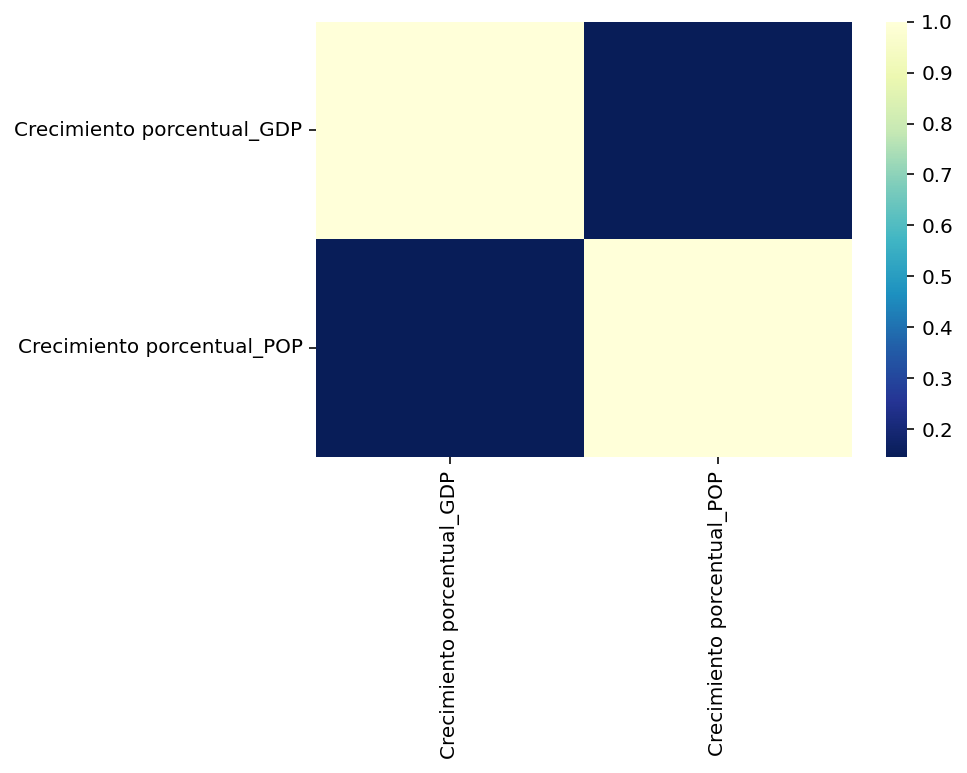

In [60]:
dataplot = sb.heatmap(corr_matrix, cmap="YlGnBu_r", annot=False)
mp.show()

In [61]:
#cambiar nombre de variable a numero, dummie variable